# Import libraries and modules
+ operator for sorting counter dict
+ io to read text file

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spacy
import re
import io
import operator

In [2]:
nlp=spacy.load('en_core_web_lg')

### customizing sentence segmenter 
+ new sentence after ';'
+ new sentence after 'SPACE' - comes after line breaks within same para for numbered lists.

In [3]:
def boundary(docs):
    for token in docs:
        if token.text==';':
            docs[token.i+1].is_sent_start=True
    return docs
    

nlp.add_pipe(boundary,before='parser')

### Reading the text file 

In [4]:
fd=io.open('doc.txt','r',encoding='utf-8')
doc=nlp(fd.read())

### Tokenising the noun phrases together and keeping punctuations with nbor token.

In [5]:
with doc.retokenize() as retokenizer:
    for np in list(doc.noun_chunks):
        attrs = {
            "tag": np.root.tag_,
            "lemma": np.root.lemma_,
            "ent_type": np.root.ent_type_,
        }
        retokenizer.merge(np, attrs=attrs)

spans = []
for word in doc[:-1]:
    if word.is_punct or not word.nbor(1).is_punct:
        continue
    start = word.i
    end = word.i + 1
    while end < len(doc) and doc[end].is_punct:
        end += 1
    span = doc[start:end]
    spans.append((span, word.tag_, word.lemma_, word.ent_type_))
with doc.retokenize() as retokenizer:
    for span, tag, lemma, ent_type in spans:
        attrs = {"tag": tag, "lemma": lemma, "ent_type": ent_type}
        retokenizer.merge(span, attrs=attrs)

In [6]:
for i,sent in enumerate(doc.sents):
    print(i,'--->',sent)


0 ---> Paragraph 1.
1 ---> Interpretation

Definitions and Inconsistency.
2 ---> Capitalized terms not otherwise defined herein or elsewhere in the Agreement have the meanings specified pursuant to Paragraph 12, and all references in this Annex to Paragraphs are to Paragraphs of this Annex.
3 ---> In the event of any inconsistency between this Annex and the provisions of the Agreement, this Annex will prevail, and in the event of any inconsistency between Paragraph 13 and the other provisions of this Annex, Paragraph 13 will prevail.


4 ---> Obligee and Obligor.
5 ---> All references in this Annex to the "Obligee" will be to either party when acting as a borrower or a secured party and all corresponding references to the "Obligor" will be to the other party when acting as a lender or a pledgor.



6 ---> Paragraph 2.
7 ---> Security Transaction

Loan.
8 ---> Each party, as the Obligor, hereby lends Lending Collateral to the other party, as the Obligee, as credit support for its Obliga

### creating Parts of speech tag list for whole document.

In [7]:
list_pos = []
for i,sent in enumerate(doc.sents):
    pos=[(token.pos_,token.text)for token in sent]
    list_pos.append(pos)
print(list_pos)

[[('NOUN', 'Paragraph'), ('NUM', '1.')], [('PROPN', 'Interpretation'), ('SPACE', '\n\n'), ('PROPN', 'Definitions'), ('CCONJ', 'and'), ('PROPN', 'Inconsistency.')], [('NOUN', 'Capitalized terms'), ('ADV', 'not'), ('ADV', 'otherwise'), ('VERB', 'defined'), ('ADV', 'herein'), ('CCONJ', 'or'), ('ADV', 'elsewhere'), ('ADP', 'in'), ('PROPN', 'the Agreement'), ('VERB', 'have'), ('NOUN', 'the meanings'), ('VERB', 'specified'), ('ADJ', 'pursuant'), ('ADP', 'to'), ('PROPN', 'Paragraph'), ('NUM', '12,'), ('CCONJ', 'and'), ('NOUN', 'all references'), ('ADP', 'in'), ('PROPN', 'this Annex'), ('ADP', 'to'), ('NOUN', 'Paragraphs'), ('VERB', 'are'), ('ADP', 'to'), ('NOUN', 'Paragraphs'), ('ADP', 'of'), ('PROPN', 'this Annex.')], [('ADP', 'In'), ('NOUN', 'the event'), ('ADP', 'of'), ('NOUN', 'any inconsistency'), ('ADP', 'between'), ('PROPN', 'this Annex'), ('CCONJ', 'and'), ('NOUN', 'the provisions'), ('ADP', 'of'), ('PROPN', 'the Agreement,'), ('PROPN', 'this Annex'), ('VERB', 'will'), ('VERB', 'preva

## N-gram function
+ for pattern mining using n pos tags at a time

In [8]:
def getNGrams(wordlist, n):
    ngrams = []
    for i in range(len(wordlist)-(n-1)):
        ngrams.append(wordlist[i:i+n])
    return ngrams

In [9]:
n_grammed=[]
for i in range(len(list_pos)):
    if not len(list_pos[i])<4:
        n_grammed.append(getNGrams(list_pos[i],4))
for i in range(len(n_grammed)):
    print(i+1, '-->' ,n_grammed[i])
    print('\n')

1 --> [[('PROPN', 'Interpretation'), ('SPACE', '\n\n'), ('PROPN', 'Definitions'), ('CCONJ', 'and')], [('SPACE', '\n\n'), ('PROPN', 'Definitions'), ('CCONJ', 'and'), ('PROPN', 'Inconsistency.')]]


2 --> [[('NOUN', 'Capitalized terms'), ('ADV', 'not'), ('ADV', 'otherwise'), ('VERB', 'defined')], [('ADV', 'not'), ('ADV', 'otherwise'), ('VERB', 'defined'), ('ADV', 'herein')], [('ADV', 'otherwise'), ('VERB', 'defined'), ('ADV', 'herein'), ('CCONJ', 'or')], [('VERB', 'defined'), ('ADV', 'herein'), ('CCONJ', 'or'), ('ADV', 'elsewhere')], [('ADV', 'herein'), ('CCONJ', 'or'), ('ADV', 'elsewhere'), ('ADP', 'in')], [('CCONJ', 'or'), ('ADV', 'elsewhere'), ('ADP', 'in'), ('PROPN', 'the Agreement')], [('ADV', 'elsewhere'), ('ADP', 'in'), ('PROPN', 'the Agreement'), ('VERB', 'have')], [('ADP', 'in'), ('PROPN', 'the Agreement'), ('VERB', 'have'), ('NOUN', 'the meanings')], [('PROPN', 'the Agreement'), ('VERB', 'have'), ('NOUN', 'the meanings'), ('VERB', 'specified')], [('VERB', 'have'), ('NOUN', 'the


99 --> [[('PROPN', 'the Obligor'), ('ADP', 'in'), ('NOUN', 'all events'), ('VERB', 'will')], [('ADP', 'in'), ('NOUN', 'all events'), ('VERB', 'will'), ('VERB', 'remain')], [('NOUN', 'all events'), ('VERB', 'will'), ('VERB', 'remain'), ('ADJ', 'liable')], [('VERB', 'will'), ('VERB', 'remain'), ('ADJ', 'liable'), ('ADP', 'for')], [('VERB', 'remain'), ('ADJ', 'liable'), ('ADP', 'for'), ('NOUN', 'any amounts')], [('ADJ', 'liable'), ('ADP', 'for'), ('NOUN', 'any amounts'), ('VERB', 'remaining')], [('ADP', 'for'), ('NOUN', 'any amounts'), ('VERB', 'remaining'), ('ADJ', 'unpaid')], [('NOUN', 'any amounts'), ('VERB', 'remaining'), ('ADJ', 'unpaid'), ('ADP', 'after')], [('VERB', 'remaining'), ('ADJ', 'unpaid'), ('ADP', 'after'), ('NOUN', 'any liquidation,')], [('ADJ', 'unpaid'), ('ADP', 'after'), ('NOUN', 'any liquidation,'), ('NOUN', 'Set-off and/or application')], [('ADP', 'after'), ('NOUN', 'any liquidation,'), ('NOUN', 'Set-off and/or application'), ('ADP', 'under')], [('NOUN', 'any liquid

### Counter of frequent n-gram patterns.

In [10]:
zip_gram=[]
for i in range(len(n_grammed)):
    for jj in n_grammed[i]:
        zipd=zip(*jj)
        zip_gram.append(list(zipd))
a=zip_gram[0][0]
print(a)
zip_gram

('PROPN', 'SPACE', 'PROPN', 'CCONJ')


[[('PROPN', 'SPACE', 'PROPN', 'CCONJ'),
  ('Interpretation', '\n\n', 'Definitions', 'and')],
 [('SPACE', 'PROPN', 'CCONJ', 'PROPN'),
  ('\n\n', 'Definitions', 'and', 'Inconsistency.')],
 [('NOUN', 'ADV', 'ADV', 'VERB'),
  ('Capitalized terms', 'not', 'otherwise', 'defined')],
 [('ADV', 'ADV', 'VERB', 'ADV'), ('not', 'otherwise', 'defined', 'herein')],
 [('ADV', 'VERB', 'ADV', 'CCONJ'), ('otherwise', 'defined', 'herein', 'or')],
 [('VERB', 'ADV', 'CCONJ', 'ADV'), ('defined', 'herein', 'or', 'elsewhere')],
 [('ADV', 'CCONJ', 'ADV', 'ADP'), ('herein', 'or', 'elsewhere', 'in')],
 [('CCONJ', 'ADV', 'ADP', 'PROPN'),
  ('or', 'elsewhere', 'in', 'the Agreement')],
 [('ADV', 'ADP', 'PROPN', 'VERB'),
  ('elsewhere', 'in', 'the Agreement', 'have')],
 [('ADP', 'PROPN', 'VERB', 'NOUN'),
  ('in', 'the Agreement', 'have', 'the meanings')],
 [('PROPN', 'VERB', 'NOUN', 'VERB'),
  ('the Agreement', 'have', 'the meanings', 'specified')],
 [('VERB', 'NOUN', 'VERB', 'ADJ'),
  ('have', 'the meanings', 'spec

In [11]:
c={}
for i in range(len(zip_gram)):
    a=zip_gram[i][0]
    if a in c.keys():
        c[a]+=1
    else:
        c[a]=1
sort_c= sorted(c.items(), key=operator.itemgetter(1),reverse=True)
(sort_c)

[(('ADP', 'NOUN', 'ADP', 'NOUN'), 137),
 (('ADP', 'NOUN', 'ADP', 'PROPN'), 113),
 (('NOUN', 'ADP', 'NOUN', 'ADP'), 85),
 (('PROPN', 'ADP', 'NOUN', 'ADP'), 56),
 (('VERB', 'ADP', 'NOUN', 'ADP'), 46),
 (('ADP', 'PROPN', 'ADP', 'NOUN'), 45),
 (('NOUN', 'ADP', 'PROPN', 'ADP'), 42),
 (('NOUN', 'VERB', 'ADP', 'PROPN'), 39),
 (('ADP', 'PROPN', 'ADP', 'PROPN'), 38),
 (('VERB', 'ADP', 'PROPN', 'NUM'), 34),
 (('NOUN', 'ADP', 'PROPN', 'VERB'), 33),
 (('ADP', 'NOUN', 'CCONJ', 'NOUN'), 31),
 (('NOUN', 'VERB', 'ADP', 'NOUN'), 30),
 (('NOUN', 'CCONJ', 'NOUN', 'ADP'), 30),
 (('NOUN', 'ADP', 'NOUN', 'VERB'), 30),
 (('ADP', 'NOUN', 'VERB', 'ADP'), 28),
 (('VERB', 'VERB', 'ADP', 'NOUN'), 27),
 (('ADP', 'PROPN', 'VERB', 'VERB'), 26),
 (('VERB', 'NOUN', 'ADP', 'NOUN'), 26),
 (('ADP', 'PROPN', 'NUM', 'SPACE'), 26),
 (('VERB', 'ADP', 'PROPN', 'ADP'), 25),
 (('VERB', 'VERB', 'PART', 'VERB'), 25),
 (('NOUN', 'ADP', 'PROPN', 'CCONJ'), 23),
 (('ADJ', 'ADP', 'NOUN', 'ADP'), 22),
 (('CCONJ', 'NOUN', 'ADP', 'NOUN')

### list of similar grammatic tokens.

In [12]:
np=[[] for i in range(len(sort_c))]
for i in range(len(sort_c)):
    for j in range(len(zip_gram)):
        if sort_c[i][0]==zip_gram[j][0]:
            np[i].append(zip_gram[j][1])
    print(sort_c[i][0],i+1, '--->  ','\n',np[i],'\n\n')

('ADP', 'NOUN', 'ADP', 'NOUN') 1 --->   
 [('In', 'the event', 'of', 'any inconsistency'), ('in', 'the event', 'of', 'any inconsistency'), ('to', 'the Obligee right', 'of', 'Set-off'), ('as', 'a result', 'of', 'an Event'), ('to', 'the provisions', 'of', 'Paragraphs'), ('in', 'the form', 'of', 'securities,'), ('to', 'the other party,', 'as', 'theObligee,'), ('as', 'theObligee,', 'as', 'security'), ('without', 'any further action', 'by', 'either party.'), ('in', 'the form', 'of', 'securities,'), ('with', 'respect', 'to', 'the other party;'), ('as', 'the result', 'of', 'an Event'), ('with', 'respect', 'to', 'the other party.'), ('than', 'the close', 'of', 'business'), ('than', 'the close', 'of', 'business'), ('than', 'the close', 'of', 'business'), ('in', 'the case', 'of', '(I)'), ('than', 'the close', 'of', 'business'), ('in', 'the case', 'of', '(I)'), ('In', 'the case', 'of', 'a dispute'), ('at', 'mid-market', 'from', 'Reference Market-makers'), ('from', 'Reference Market-makers', 'for'

('PROPN', 'PROPN', 'ADP', 'NOUN') 249 --->   
 [('Pledging', 'Collateral', 'in', 'accordance'), ('Pledging', 'Collateral', 'through', 'one or more public or private sales'), ('Pledging', 'Collateral', 'in', 'the form'), ('and\n\nCash Deposit,', 'the Base Currency Equivalent', 'of', 'the face amount')] 


('PROPN', 'VERB', 'CCONJ', 'VERB') 250 --->   
 [('its Custodian', 'receives', 'or', 'is'), ('the Obligee', 'will,', 'or', 'will'), ('its Custodian', 'receives', 'or', 'is'), ('("Deposit Account")', 'opened', 'and', 'maintained')] 


('VERB', 'VERB', 'PROPN', 'ADP') 251 --->   
 [('will', 'constitute', 'Posted Lending Collateral', 'in'), ('been', 'Transferred,', 'the Local Business Day', 'on'), ('has', 'Transferred', 'Eligible Credit Support', 'under'), ('will', 'constitute', 'Posted Lending Collateral', 'in')] 


('VERB', 'ADV', 'ADJ', 'NOUN') 252 --->   
 [('make,', 'when', 'due,', 'any Transfer'), ('are', 'then', 'due,', 'the other party ('), ('pay', 'when', 'due', 'all taxes,'), ('

('NOUN', 'VERB', 'CCONJ', 'ADV') 515 --->   
 [('any Obligations (', 'including,', 'but', 'not'), ('no amounts', 'are,', 'or', 'thereafter')] 


('VERB', 'CCONJ', 'ADV', 'ADJ') 516 --->   
 [('including,', 'but', 'not', 'limited'), ('including,', 'but', 'not', 'limited')] 


('CCONJ', 'ADV', 'ADJ', 'ADP') 517 --->   
 [('but', 'not', 'limited', 'to,'), ('but', 'not', 'limited', 'to,')] 


('CCONJ', 'ADP', 'NOUN', 'CCONJ') 518 --->   
 [('and', 'without', 'any prior notice', 'or'), ('and', 'without', 'any prior notice', 'or')] 


('PROPN', 'VERB', 'PROPN', 'NOUN') 519 --->   
 [('the Exercising Party', 'is', 'the Obligee,', 'the right'), ('the Exercising Party', 'is', 'the Obligor,', 'the right')] 


('VERB', 'PROPN', 'NOUN', 'PART') 520 --->   
 [('is', 'the Obligee,', 'the right', 'to'), ('is', 'the Obligor,', 'the right', 'to')] 


('CCONJ', 'SPACE', 'ADP', 'PROPN') 521 --->   
 [('and', '\n\n', 'if', 'the Exercising Party'), ('and', '\n\n', 'upon', 'the Transfer')] 


('CCONJ', 'ADP

('ADP', 'NOUN', 'ADP', 'PRON') 753 --->   
 [('of', 'care', 'as', 'it')] 


('ADP', 'PRON', 'VERB', 'VERB') 754 --->   
 [('as', 'it', 'would', 'exercise')] 


('PRON', 'VERB', 'VERB', 'ADP') 755 --->   
 [('it', 'would', 'exercise', 'with')] 


('PROPN', 'CCONJ', 'VERB', 'CCONJ') 756 --->   
 [('any Distributions,', 'or', 'enforce', 'or')] 


('VERB', 'NOUN', 'VERB', 'DET') 757 --->   
 [('preserve', 'any rights', 'pertaining', 'thereto.')] 


('NOUN', 'VERB', 'DET', 'SPACE') 758 --->   
 [('any rights', 'pertaining', 'thereto.', '\n\n')] 


('NUM', 'ADP', 'VERB', 'PROPN') 759 --->   
 [('13', 'for', 'holding', 'Posted Collateral,')] 


('ADP', 'VERB', 'PROPN', 'PROPN') 760 --->   
 [('for', 'holding', 'Posted Collateral,', 'the Obligee')] 


('PROPN', 'PROPN', 'CCONJ', 'PART') 761 --->   
 [('Pledging', 'Collateral', 'or', 'to')] 


('PART', 'VERB', 'NOUN', 'PROPN') 762 --->   
 [('to', 'appoint', 'an agent (', 'a "Custodian")')] 


('VERB', 'NOUN', 'PROPN', 'PART') 763 --->   
 [('a

('NUM', 'ADP', 'ADP', 'NOUN') 1018 --->   
 [('6(d),', 'except', 'for', 'transfer,')] 


('NOUN', 'DET', 'VERB', 'ADP') 1019 --->   
 [('similar taxes', 'that', 'result', 'from')] 


('VERB', 'ADP', 'CCONJ', 'ADP') 1020 --->   
 [('expensesincurred', 'by', 'or', 'on')] 


('NUM', 'VERB', 'VERB', 'ADJ') 1021 --->   
 [('8', 'will', 'be', 'payable,')] 


('ADP', 'NOUN', 'CCONJ', 'ADJ') 1022 --->   
 [('on', 'demand', 'and', 'pursuant')] 


('NOUN', 'CCONJ', 'ADJ', 'ADP') 1023 --->   
 [('demand', 'and', 'pursuant', 'to')] 


('PROPN', 'CCONJ', 'ADP', 'ADV') 1024 --->   
 [('the Defaulting Party', 'or,', 'if', 'there')] 


('ADP', 'ADV', 'VERB', 'PROPN') 1025 --->   
 [('if', 'there', 'is', 'no Defaulting Party,')] 


('ADV', 'VERB', 'PROPN', 'ADV') 1026 --->   
 [('there', 'is', 'no Defaulting Party,', 'equally')] 


('ADV', 'ADP', 'NOUN', 'SPACE') 1027 --->   
 [('equally', 'by', 'the parties.', '\n\n')] 


('PROPN', 'DET', 'VERB', 'PART') 1028 --->   
 [('An Obligee', 'that', 'fails', 

In [14]:
list_token=[]
for i,sent in enumerate(doc.sents):
    t=[(token.text).rstrip(';') for token in sent]
    list_token.append(t)

t_grammed=[]
for i in range(len(list_token)):
    if not len(list_token[i])<4:
        t_grammed.append(getNGrams(list_token[i],4))

In [15]:
vec=[]
for i in range(len(t_grammed[1])):
    for j in range(len(t_grammed[1][i])):
        c=nlp(t_grammed[1][i][j])
        vec.append(c.vector)
print(len(vec),'   ',len(t_grammed[1]))
vec


96     24


[array([-2.70012990e-02, -7.25599974e-02, -3.29824984e-01,  2.13684998e-02,
         1.46424994e-01, -1.96735501e-01, -3.47755015e-01,  3.11731488e-01,
         6.50039986e-02,  1.83579993e+00,  4.05600071e-02,  3.31335008e-01,
        -1.16884395e-01,  1.65609002e-01,  2.24519998e-01,  1.78444996e-01,
         2.86074996e-01,  5.40734529e-01, -6.37645051e-02, -1.50981501e-01,
        -3.00684988e-01, -5.45939989e-02, -7.25689977e-02,  1.29473507e-01,
        -1.40349999e-01, -7.21039996e-02,  7.69769996e-02,  2.37150025e-03,
        -1.52219996e-01, -2.56440006e-02,  1.28176510e-01,  7.61700049e-02,
         5.33564985e-02,  1.98344991e-01, -3.42648506e-01,  1.46070004e-01,
         3.59479994e-01, -3.81924957e-02, -6.69804990e-01,  1.37331501e-01,
         1.03382006e-01, -2.33850032e-02,  3.15434992e-01,  1.40539989e-01,
         9.52785015e-02, -2.34056994e-01,  4.88580018e-02,  2.64640003e-01,
         2.23459989e-01,  5.43619990e-01, -2.25585014e-01,  1.37345001e-01,
        -1.5

In [17]:
from copy import deepcopy
v_grammed=deepcopy(t_grammed)


In [18]:
vec=[[]for i in range(len(t_grammed))]
for i in range(len(v_grammed)):
    vec[i]=[[] for j in range(len(n_grammed[i]))]
    for j in range(len(v_grammed[i])):
        vec[i][j]=[]
        for k in range(len(v_grammed[i][j])):
            vec[i][j].append( nlp(v_grammed[i][j][k]).vector)
            
            

In [19]:
def sent_vec(vec_list):
    size=len(vec_list)
    return sum(vec_list)/size

def word_gram(wordlist):
    return ' '.join(wordlist)

In [20]:
map_d=[]
for i in range (len(v_grammed)):
    for j in range(len(v_grammed[i])):
        map_d.append(word_gram(v_grammed[i][j]))

vect=[]
for i in range(len(vec)):
    for j in range(len(vec[i])):
        vect.append(sent_vec(vec[i][j]))

In [21]:
# needed imports
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import pandas as pd
%matplotlib inline

In [22]:
df=pd.DataFrame(vect)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.025701,-0.091645,-0.191591,0.027701,0.138975,0.132231,0.137423,0.086330,0.135863,1.357825,...,-0.190183,-0.047060,0.003311,0.157498,0.090334,-0.062320,0.035197,0.053195,0.206980,-0.021348
1,-0.041937,-0.057493,-0.186029,-0.111470,0.085094,0.064402,0.125683,0.037841,0.076618,1.238200,...,-0.110151,0.042762,-0.063345,0.131921,-0.072344,-0.063625,-0.022376,0.070293,0.099684,-0.055369
2,0.022542,-0.022762,-0.410009,-0.067097,0.098079,0.044829,-0.113914,-0.046907,-0.040282,2.212375,...,-0.164620,0.073189,-0.225392,-0.047677,0.143357,-0.002137,-0.267265,-0.257737,0.186536,-0.062006
3,-0.020865,-0.060562,-0.459100,-0.225879,-0.003369,0.086732,-0.061173,-0.185365,-0.086185,2.083150,...,-0.115497,0.037409,-0.326693,-0.188670,0.075513,-0.107070,-0.296988,-0.276173,0.153740,0.063181
4,-0.065542,-0.032564,-0.454920,-0.100735,0.128713,0.067292,-0.140961,-0.238097,-0.092575,1.951200,...,-0.083483,0.030364,-0.226038,-0.158783,-0.080092,-0.077495,-0.283943,-0.307808,0.165466,0.054616


In [23]:
x=df.iloc[:,:].values

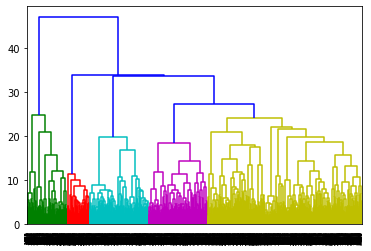

In [24]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(x,method='ward'),color_threshold=25)
# plt.figure(figsize=(400, 100))

# plt.show()


In [33]:
clist=np.unique(dendrogram['color_list'])
from collections import defaultdict

clusterdict = defaultdict(list)
for ind,clust in zip(dendrogram['leaves'],dendrogram['color_list']):
    clusterdict[clust].append(ind)
clf=[]
for c in clist:
     clf.append(list(map(lambda x: map_d[x],clusterdict[c])))
    

In [34]:
clist

array(['b', 'c', 'g', 'm', 'r', 'y'], dtype='<U1')

In [26]:
np.asarray(clf[0])[np.random.randint(1, len(clf[0]), 20)].tolist() #refrence to accordance

['Calculations and Substitutions \n\n',
 'Calculations and Substitutions \n\n',
 'Conditions Precedent, Transfer Timing, Calculations and',
 'Conditions Precedent, Transfer Timing, Calculations and',
 'Calculations and Substitutions \n\n',
 'Conditions Precedent, Transfer Timing, Calculations and',
 'Calculations and Substitutions \n\n',
 'Conditions Precedent, Transfer Timing, Calculations and',
 'Conditions Precedent, Transfer Timing, Calculations and',
 'Calculations and Substitutions \n\n',
 'limited to, all calculations,',
 'limited to, all calculations,',
 'Conditions Precedent, Transfer Timing, Calculations and',
 'limited to, all calculations,',
 'limited to, all calculations,',
 'Conditions Precedent, Transfer Timing, Calculations and',
 'Calculations and Substitutions \n\n',
 'Calculations and Substitutions \n\n',
 'limited to, all calculations,',
 'limited to, all calculations,']

In [27]:
np.asarray(clf[1])[np.random.randint(1, len(clf[1]), 20)].tolist() #dependant clause

['book-entry, the giving of written or electronic instructions',
 'any inconsistency between this Annex and',
 'the same, regardless of',
 'payable, on demand and',
 '\n\n\x0c\n\n\n in the case of',
 'on the basis of daily compounding',
 'registration, the giving of written or electronic demands',
 'the fourth Local Business Day following the date of',
 'its estimates at mid-market of',
 'the Valuation Agent and in the',
 'in the currency in which',
 'Anything referred to in',
 'of the Agreement, an Event of',
 '5 in the case of',
 'and in the event of',
 'satisfaction in full of',
 'or in Termination Currency at',
 'a demand for the Transfer of',
 'on the Local Business Day following \n',
 'in a commercial bank located in']

In [28]:
np.asarray(clf[2])[np.random.randint(1, len(clf[2]), 20)].tolist() #equivalence clause

['in Paragraphs 10(b) and',
 'the meaning specified in Paragraph',
 'occurs under Paragraph 3',
 'Paragraphs 4(a) and 4(b),',
 'between Paragraph 13 and',
 'of such securities pursuant to',
 'that party in Paragraph 13',
 'the Obligee under Paragraph 6(a)',
 'Paragraph 6(a) or 6(d).',
 'and subjectto Paragraph 4(a), in',
 'the re-pledge or re- hypothecation granted under Paragraph',
 'expressed as a negative number) pursuant',
 'the meaning specified in Paragraph',
 'Paragraph 6(d)(i) above) over',
 'the meaning specified in Paragraph',
 'forth in Paragraph 8 (',
 'pursuant to this Paragraph, the Valuation Agent',
 'in Paragraphs 6(c)(i) and',
 'Subject to Paragraphs 4(a)',
 'in Paragraph 13(h), means:']

In [29]:
np.asarray(clf[3])[np.random.randint(1, len(clf[3]), 40)].tolist() #Numeral citations

['Until the Obligee is required,',
 'pay when due all taxes,',
 'be entitled to have',
 'a particular Transaction, then fewer than four quotations may',
 '6(d), the Obligee will exercise',
 'it thinks fit, and',
 'this Annex, and any withholding tax which',
 'yet been Transferred, the Local Business Day',
 'to make, when due,',
 'as the Obligor and has',
 'will be made not',
 'to whom the amount determined',
 'of cash was Transferred',
 'and perfection, as applicable,',
 'the preceding sentence, the Obligee will have',
 'is entitled to receive',
 'as such for that party',
 'to do so at',
 '\n\n if the Exercising Party is',
 'for, as applicable, the',
 'a particular Transaction, then fewer than four quotations may',
 'any, that would be',
 'will, not later than',
 'means either party, when that party (',
 'which the current Interest Amount is to',
 'applicable law and can not',
 'either party, when that party ( i)',
 'to receive such Distributions, regardless',
 'when that party ( i) ma

In [30]:
np.asarray(clf[4])[np.random.randint(1, len(clf[4]), 40)].tolist() #'By Statements(plain or action)'

['the Obligee) during any Interest Period, the Obligee',
 'as a positive number) or by',
 'by the Obligor, the Obligee will,',
 'or increased by that Transfer,',
 'be made by it',
 'by the Valuation Agent as of',
 'compliance by the Obligor with',
 'any remaining amounts payable by the Obligor',
 'of all Posted Credit Support held by',
 'of Posted Pledging Collateral by a Custodian',
 'any other rights or privilegesgranted by',
 'payable by the Obligor with',
 'other entity specified by the recipient,',
 'be paid or delivered',
 'to Posted Credit Support held by',
 'the recipient or its account accompanied',
 'made by the Notification Time, then',
 'incurred by the other party in',
 'equally by the parties. \n\n',
 'equally by the parties. \n\n',
 'the Transfer by the Obligee to',
 'by the Obligee under this Annex',
 'all amounts payable by the Obligor',
 'be discharged by making',
 'on the exchange multiplied by',
 'in dispute by seekingfour',
 'or delivered by registration,',
 'upon 

In [31]:
np.asarray(clf[5])[np.random.randint(1, len(clf[5]), 40)].tolist() #Random

['first priority continuing security',
 'means the currency specified as',
 'that: \n\n no Event of',
 'required to be Transferred',
 'including, without limitation, any duty',
 'to resolve the dispute and (',
 'have the right to: \n\n',
 'Posted Collateral and Posted Other Support. \n\n',
 'in Japan and agreed',
 'be a Valuation Date for this purpose).',
 'Posted Pledging Collateral held',
 'that Valuation Date equals or exceeds',
 'up to the Value of',
 'instead be specified in',
 'it Transfers to the Obligee',
 'the Obligor with respect to',
 'be calculated on the basis',
 'hereunder for its own acts or',
 'will have a valid',
 'any additional obligations specified for that party',
 'that could adversely affect',
 'this Annex with respect to',
 'the Obligor only to the extent',
 'credit support for its Obligations, and',
 'the Obligee, as credit support for',
 'for any potential liability under Section',
 'securities that will be',
 'of Transfer as close',
 'pay the Obligor ( to the

In [32]:
clf[6]#Random

IndexError: list index out of range